In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
#rs_datapath = '/content/drive/MyDrive/ABIDEMIST444TS/*_ABIDE_444Parcels_rest.txt'
rs_datapath = '/content/drive/MyDrive/HBNSchFSIQ/*_HBN_500Parcels_rest_run_1.txt'
rsfilename_list = np.sort(glob.glob(rs_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []

#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    #print(rs_corr_shen.shape)
    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_shen)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    rs_non_zero = np.where(np.any(rs_corr_shen == 0, axis = 1))
    #append the subject-wise indices to a list
    rs_non_zero_roi = np.concatenate((rs_non_zero_roi, rs_non_zero), axis = None)

#find all the unique indices whose ROI timeseries contain a value of 0
find_unique_indices = np.unique(rs_non_zero_roi)
find_unique_indices_int = find_unique_indices.astype(int)
print(find_unique_indices_int)

for rsfilename in range(len(rsfilename_list)):

    rsname = rsfilename + 1
    #access the subject-wise ROI timeseries of each individual for Session 1
    rsfMRI_timeseries_2d = rsfMRI_timeseries[rsfilename]

    #remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 1
    rsfMRI_nonzero_timeseries = np.delete(rsfMRI_timeseries_2d, find_unique_indices_int, axis = 0)

    #compute Pearson’s correlation coefficient for Session 1
    #rsfMRI_corr = np.corrcoef(rsfMRI_nonzero_timeseries)
    #print(rsfMRI_corr.shape)
    ##pd.DataFrame(rsfMRI_corr).to_csv(f"/content/drive/MyDrive/connectivity_matrices_MIST_ABIDE/00{rsname}.csv", header = None, index = None)


[138 410]


In [ ]:
zero_ROIS = find_unique_indices_int.copy()
zero_ROIS


array([138, 410])

In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/FCABIDE/TS/ABIDETS500_N407/*_ABIDE_TDC_500Parcels_2mm_rest_run.txt'
rsfilename_list = np.sort(glob.glob(rs_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []
rsfMRI_corr_test = []
#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    rs_corr_shen = np.delete(rs_corr_shen, zero_ROIS, axis = 0)
    print(rs_corr_shen.shape)
    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_shen)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    rs_non_zero = np.where(np.any(rs_corr_shen == 0, axis = 1))
    #append the subject-wise indices to a list
    rs_non_zero_roi = np.concatenate((rs_non_zero_roi, rs_non_zero), axis = None)

for rsfilename in range(len(rsfilename_list)):

    rsname = rsfilename + 1
    #access the subject-wise ROI timeseries of each individual for Session 1
    rsfMRI_timeseries_2d = rsfMRI_timeseries[rsfilename]

    #compute Pearson’s correlation coefficient for Session 1
    rsfMRI_corr = np.corrcoef(rsfMRI_timeseries_2d)
    print(rsfMRI_corr.shape)
    rsfMRI_corr[np.isnan(rsfMRI_corr)] = 0
    pd.DataFrame(rsfMRI_corr).to_csv(f"/content/drive/MyDrive/FCABIDE/connectivity_matrices/connectivity_matrices_GENABIDE_TDC_Schaefer500/00{rsname}.csv", header = None, index = None)
    rsfMRI_corr_test.append(rsfMRI_corr)


In [ ]:
rsfMRI_corr_test = np.array(rsfMRI_corr_test)
rsfMRI_corr_test[0]

array([[ 1.        ,  0.59011696,  0.4636471 , ..., -0.25795736,
         0.0556278 , -0.22712791],
       [ 0.59011696,  1.        ,  0.40636626, ..., -0.18302093,
         0.2398131 , -0.06357384],
       [ 0.4636471 ,  0.40636626,  1.        , ...,  0.01287761,
         0.1182946 , -0.01375346],
       ...,
       [-0.25795736, -0.18302093,  0.01287761, ...,  1.        ,
         0.36700248,  0.64786053],
       [ 0.0556278 ,  0.2398131 ,  0.1182946 , ...,  0.36700248,
         1.        ,  0.19935355],
       [-0.22712791, -0.06357384, -0.01375346, ...,  0.64786053,
         0.19935355,  1.        ]])

In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/HBNTS306/*_HBN_268Parcels_rest_run_1.txt'
mv_datapath = '/content/drive/MyDrive/HBNTS306/*_HBN_268Parcels_rest_run_2.txt'

rsfilename_list = np.sort(glob.glob(rs_datapath))
mvfilename_list = np.sort(glob.glob(mv_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []

#initialise an empty list to store all subjects timeseries for Sessions 2
mv_non_zero_roi = []
mvfMRI_timeseries = []
mvfMRI_timeseries_2d = []
mvfMRI_timeseries_corr = []

#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_shen)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    rs_non_zero = np.where(np.any(rs_corr_shen == 0, axis = 1))
    #append the subject-wise indices to a list
    rs_non_zero_roi = np.concatenate((rs_non_zero_roi, rs_non_zero), axis = None)

#convert the appended list of all the subjects' timeseries to an array
rsfMRI_timeseries_to_array = np.asarray(rsfMRI_timeseries)

#iterate through the ROIs timeseries of each subject for Session 2
for mvfilename in mvfilename_list:

    mv_corr_shen = np.transpose(np.loadtxt(mvfilename))
    #append the ROI timeseries for each subject to a list
    mvfMRI_timeseries.append(mv_corr_shen)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    mv_non_zero = np.where(np.any(mv_corr_shen == 0, axis = 1))
    #append the subject-wise indices to a list
    mv_non_zero_roi = np.concatenate((mv_non_zero_roi, mv_non_zero), axis = None)

#convert the appended list of all the subjects' timeseries to an array
mvfMRI_timeseries_to_array = np.asarray(mvfMRI_timeseries)

#append all subject-wise indices whose ROI timeseries contain a value of 0 for Session 1 & 2
all_indices_s1_s2 = np.concatenate((rs_non_zero_roi, mv_non_zero_roi), axis = None)
#find all the unique indices whose ROI timeseries contain a value of 0
find_unique_indices = np.unique(all_indices_s1_s2)
find_unique_indices_int = find_unique_indices.astype(int)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 1
rsfMRI_nonzero_timeseries = np.delete(rsfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)
#sanity check to verify the content and size of the resulting nonzero ROI timeseries
print(rsfMRI_nonzero_timeseries.shape)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 2
mvfMRI_nonzero_timeseries = np.delete(mvfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)
#sanity check to verify the content and size of the resulting nonzero ROI timeseries
print(mvfMRI_nonzero_timeseries.shape)


(306, 225, 375)
(306, 225, 375)


##### Scrubbing

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

confound_dir_run01 = np.sort(glob.glob('/content/drive/MyDrive/HBNMOTION479/*_task-rest_run-1_bold_mcf.nii.gz_rel.rms'))
confound_dir_run02 = np.sort(glob.glob('/content/drive/MyDrive/HBNMOTION479/*_task-rest_run-2_bold_mcf.nii.gz_rel.rms'))

for file in confound_dir_run02:

  sub = os.path.basename(file).split('_')[0]
  confound_df = np.loadtxt(file)
  all_confound_vols = np.insert(confound_df, 0, 0)
  np.savetxt('/content/drive/MyDrive/motion_params_HBN479FSIQ/'f'{sub}_task-rest_run-2_bold_mcf.nii.gz_rel.rms', all_confound_vols)


In [ ]:
rs_motion_param_datapath = '/content/drive/MyDrive/motion_params_HBN516CBCL/*_task-rest_run-1_bold_mcf.nii.gz_rel.rms'
mv_motion_param_datapath = '/content/drive/MyDrive/motion_params_HBN516CBCL/*_task-rest_run-2_bold_mcf.nii.gz_rel.rms'

rsfilename_motion_param_list = np.sort(glob.glob(rs_motion_param_datapath))
mvfilename_motion_param_list = np.sort(glob.glob(mv_motion_param_datapath))

rssubj_exclusion = []
mvsubj_exclusion = []
best_timepoints_size_s1 = []
best_timepoints_size_s2 = []
all_unique_contaminated_indices = []
rsall_unique_contaminated_indices = []
mvall_unique_contaminated_indices = []

#select head motion threshold to identify contaminated timepoints
threshold = 0.20

#select a minimum amount of timepoints to be retained after identifying contaminated timepoints
mintimepoint = 20


In [ ]:
rs_motion_param_datapath = '/content/drive/MyDrive/ABIDE_motion_params_fd/*_fd_motion_params.txt'
rsfilename_motion_param_list = np.sort(glob.glob(rs_motion_param_datapath))

rssubj_exclusion = []
mvsubj_exclusion = []
best_timepoints_size_s1 = []
best_timepoints_size_s2 = []
all_unique_contaminated_indices = []
rsall_unique_contaminated_indices = []
mvall_unique_contaminated_indices = []

#select head motion threshold to identify contaminated timepoints
threshold = 0.20

#select a minimum amount of timepoints to be retained after identifying contaminated timepoints
mintimepoint = 1

In [ ]:
for rsfilename in range(rsfMRI_nonzero_timeseries.shape[0]):

    #load each subject's head motion parameter files for Session 1
    rmsFDs1 = np.loadtxt(rsfilename_motion_param_list[rsfilename])
    #find the indices of the contaminated timepoints with rmsFD > threshold
    rmsFDs1_thresh = np.asarray(np.where(rmsFDs1 > threshold))

    #find the indices of the preceding timepoints to be srubbed from the timeseries
    left_indices = rmsFDs1_thresh - 1
    #remove the indices less than 0 as indices should always start from zero
    left_nonzero_indices = left_indices[left_indices >= 0]
    #find the indices of the first succeeding timepoints to be scrubbed from the timeseries
    right_first_indices = rmsFDs1_thresh + 1
    #remove the indices of the first succeeding timepoints if they exceed the size of the timepoints
    right_first_in_range_indices = right_first_indices[right_first_indices < rmsFDs1.shape]
    #find the indices of the second succeeding timepoints to be scrubbed from the timeseries
    right_second_indices = rmsFDs1_thresh + 2
    #remove the indices of the second succeeding timepoints if they exceed the size of the timepoints
    right_second_in_range_indices = right_second_indices[right_second_indices < rmsFDs1.shape]

    #concatenate all the contaminated indices including the scrubbed indices into an array
    all_contaminated_indices = np.concatenate((rmsFDs1_thresh, left_nonzero_indices, right_first_in_range_indices, right_second_in_range_indices), axis = None)
    #find all the unique contaminated indices including the scrubbed indices
    unique_contaminated_indices = np.unique(all_contaminated_indices).astype(int)
    #append all subjects' unique contaminated indices including the scrubbed indices into an array
    all_unique_contaminated_indices.append(unique_contaminated_indices)

    #find the remaining amount of timepoints left after identifying the contaminated timepoints
    best_timepoints_size = rsfMRI_nonzero_timeseries.shape[2] - np.asarray(unique_contaminated_indices.shape)
    #store all subjects' remaining amount of timepoints left in an array
    best_timepoints_size_s1.append(best_timepoints_size)

    #identify the subjects who has less remaining amount of timepoints than the minimum amount of timepoints required
    if (best_timepoints_size < mintimepoint):
        rssubj_exclusion.append(rsfilename)

print(np.array(rssubj_exclusion).shape[0])


6


In [ ]:
for mvfilename in range(mvfMRI_nonzero_timeseries.shape[0]):

    #load each subject's head motion parameter files for Session 2
    rmsFDs2 = np.loadtxt(mvfilename_motion_param_list[mvfilename])
    #find the indices of the contaminated timepoints with rmsFD > threshold
    rmsFDs2_thresh = np.asarray(np.where(rmsFDs2 > threshold))

    #find the indices of the preceding timepoints to be srubbed from the timeseries
    mvleft_indices = rmsFDs2_thresh - 1
    #remove the indices less than 0 as indices should always start from zero
    mvleft_nonzero_indices = mvleft_indices[mvleft_indices >= 0]
    #find the indices of the first succeeding timepoints to be scrubbed from the timeseries
    mvright_first_indices = rmsFDs2_thresh + 1
    #remove the indices of the first succeeding timepoints if they exceed the size of the timepoints
    mvright_first_in_range_indices = mvright_first_indices[mvright_first_indices < rmsFDs2.shape]
    #find the indices of the second succeeding timepoints to be scrubbed from the timeseries
    mvright_second_indices = rmsFDs2_thresh + 2
    #remove the indices of the second succeeding timepoints if they exceed the size of the timepoints
    mvright_second_in_range_indices = mvright_second_indices[mvright_second_indices < rmsFDs2.shape]

    #concatenate all the contaminated indices including the scrubbed indices into an array
    mvall_contaminated_indices = np.concatenate((rmsFDs2_thresh, mvleft_nonzero_indices, mvright_first_in_range_indices, mvright_second_in_range_indices), axis = None)
    #find all the unique contaminated indices including the scrubbed indices
    mvunique_contaminated_indices = np.unique(mvall_contaminated_indices).astype(int)
    #append all subjects' unique contaminated indices including the scrubbed indices into an array
    mvall_unique_contaminated_indices.append(mvunique_contaminated_indices)

    #find the remaining amount of timepoints left after identifying the contaminated timepoints
    best_mvtimepoints_size = mvfMRI_nonzero_timeseries.shape[2] - np.asarray(mvunique_contaminated_indices.shape)
    #store all subjects' remaining amount of timepoints left in an array
    best_timepoints_size_s2.append(best_mvtimepoints_size)

    #identify the subjects who has less remaining amount of timepoints than the minimum amount of timepoints required
    if (best_mvtimepoints_size < mintimepoint):
        mvsubj_exclusion.append(mvfilename)

print(np.array(mvsubj_exclusion).shape[0])


20


In [ ]:
#concatenate all subjects to be excluded from Session 1 & Session 2
all_subj_exclusion = np.concatenate((rssubj_exclusion, mvsubj_exclusion), axis = None)
#find the unique subjects to be excluded from Session 1 & Session 2
unique_subj_exclusion = np.unique(all_subj_exclusion).astype(int)

#remove the size of the best timepoints for the subjects to be excluded for Session 1 & Session 2
best_timepoints_s1 = np.delete(best_timepoints_size_s1, unique_subj_exclusion)
best_timepoints_s2 = np.delete(best_timepoints_size_s2, unique_subj_exclusion)
print(best_timepoints_s1.shape[0]); print(best_timepoints_s2.shape[0])

#remove the subjects to be excluded from the original 3D array for Session 1 & Session 2
rsfMRI_nonzero_best_timeseries = np.delete(rsfMRI_nonzero_timeseries, unique_subj_exclusion, axis = 0)
mvfMRI_nonzero_best_timeseries = np.delete(mvfMRI_nonzero_timeseries, unique_subj_exclusion, axis = 0)
print(rsfMRI_nonzero_best_timeseries.shape); print(mvfMRI_nonzero_best_timeseries.shape)

#remove all the unique contaminated indices of the subjects to be excluded for Session 1 & Session 2
rsbest_unique_contaminated_indices = np.delete(all_unique_contaminated_indices, unique_subj_exclusion)
mvbest_unique_contaminated_indices = np.delete(mvall_unique_contaminated_indices, unique_subj_exclusion)
print(rsbest_unique_contaminated_indices.shape[0]); print(mvbest_unique_contaminated_indices.shape[0])


493
493
(493, 198, 375)
(493, 198, 375)
493
493


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
for subREST1 in range(rsfMRI_nonzero_best_timeseries.shape[0]):

  rsname = subREST1 + 1
  scrubbed_rsfMRI_timeseries = np.delete(rsfMRI_nonzero_best_timeseries, rsbest_unique_contaminated_indices[subREST1], axis = 2)
  print(scrubbed_rsfMRI_timeseries.shape)
  scrubbed_REST1_FC_matrix = np.corrcoef(scrubbed_rsfMRI_timeseries[subREST1, :, :])
  pd.DataFrame(scrubbed_REST1_FC_matrix).to_csv(f"/content/drive/MyDrive/HBNScrubbedFCFSIQ/REST1/00{rsname}.csv", header = None, index = None)


In [ ]:
for subREST2 in range(mvfMRI_nonzero_best_timeseries.shape[0]):

  mvname = subREST2 + 1
  scrubbed_mvfMRI_timeseries = np.delete(mvfMRI_nonzero_best_timeseries, mvbest_unique_contaminated_indices[subREST2], axis = 2)
  print(scrubbed_mvfMRI_timeseries.shape)
  scrubbed_REST2_FC_matrix = np.corrcoef(scrubbed_mvfMRI_timeseries[subREST2, :, :])
  pd.DataFrame(scrubbed_REST2_FC_matrix).to_csv(f"/content/drive/MyDrive/HBNScrubbedFCFSIQ/REST2/00{mvname}.csv", header = None, index = None)


##### Fingerprint

In [ ]:
#input directory for the FC matrices derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/HBNScrubbedFCFSIQ/REST1/00*.csv'
mv_datapath = '/content/drive/MyDrive/HBNScrubbedFCFSIQ/REST2/00*.csv'

rsfilename_list = np.sort(glob.glob(rs_datapath))
mvfilename_list = np.sort(glob.glob(mv_datapath))

rsfMRI_timeseries_corr = []
mvfMRI_timeseries_corr = []

for rsfilename in rsfilename_list:

  rsfMRI_corr = np.array(pd.read_csv(rsfilename, header = None))
  #truncate correlation matrix to select upper triangular matrix for Session 1
  rsfMRI_corr_shen = rsfMRI_corr.shape[0]
  arange_rsfMRI_corr, diag = np.triu_indices(rsfMRI_corr_shen, 1)
  trunc_rsfMRI_corr_shen = rsfMRI_corr[arange_rsfMRI_corr, diag]

  #append the truncated correlation matrix of all subjects to the list
  rsfMRI_timeseries_corr.append(trunc_rsfMRI_corr_shen)

for mvfilename in mvfilename_list:

  mvfMRI_corr = np.array(pd.read_csv(mvfilename, header = None))
  #truncate correlation matrix to select upper triangular matrix for Session 2
  mvfMRI_corr_shen = mvfMRI_corr.shape[0]
  arange_mvfMRI_corr, diag = np.triu_indices(mvfMRI_corr_shen, 1)
  trunc_mvfMRI_corr_shen = mvfMRI_corr[arange_mvfMRI_corr, diag]

  #append the truncated correlation matrix of all subjects to the list
  mvfMRI_timeseries_corr.append(trunc_mvfMRI_corr_shen)

#convert the list to an array for Session 1 & 2
trunc_rsfMRI_corr_to_array = np.asarray(rsfMRI_timeseries_corr)
trunc_mvfMRI_corr_to_array = np.asarray(mvfMRI_timeseries_corr)

#transpose the array to ease further computation for Session 1 & 2
trans_rsfMRI_corr = np.transpose(trunc_rsfMRI_corr_to_array)
trans_mvfMRI_corr = np.transpose(trunc_mvfMRI_corr_to_array)

#compute columnwise pearson's correlation matrix between Session 1 and Session 2
trans_rsfMRI_corr = (trans_rsfMRI_corr - trans_rsfMRI_corr.mean(axis = 0)) / trans_rsfMRI_corr.std(axis = 0)
trans_mvfMRI_corr = (trans_mvfMRI_corr - trans_mvfMRI_corr.mean(axis = 0)) / trans_mvfMRI_corr.std(axis = 0)
rs_mv_corr = np.dot(trans_rsfMRI_corr.T, trans_mvfMRI_corr) / trans_rsfMRI_corr.shape[0]

#extract the diagonal values of the final correlation matrix
diag = np.diag(rs_mv_corr)

#extract the maximum value in each row of the final correlation matrix
max_corr = np.amax(rs_mv_corr, axis = 1)

#ID is based on a binary system where each diagonal value is compared with the
#maximum value of that row in the final correlation matrix. We expect that the
#diagnoal value is greater than or equal to the maximum value of each row to
#allow successful identification
diag_to_array = np.array(diag)
max_corr_to_array = np.array(max_corr)
BID = np.greater_equal(diag_to_array, max_corr_to_array)

#success rate is defined as the total number of positive identifications divided
#by the total number of subjects
success_rate_BID = np.sum(BID)/(BID.shape)
print(success_rate_BID)


[0.75373134]


##### REST1 FC Matrices

In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/HBNTS306/*_HBN_268Parcels_rest_run_1.txt'
mv_datapath = '/content/drive/MyDrive/HBNTS306/*_HBN_268Parcels_rest_run_2.txt'
rsfilename_list = np.sort(glob.glob(rs_datapath))
mvfilename_list = np.sort(glob.glob(mv_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []

#initialise an empty list to store all subjects timeseries for Sessions 2
mv_non_zero_roi = []
mvfMRI_timeseries = []
mvfMRI_timeseries_2d = []
mvfMRI_timeseries_corr = []

#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_shen)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    rs_non_zero = np.where(np.any(rs_corr_shen == 0, axis = 1))
    #append the subject-wise indices to a list
    rs_non_zero_roi = np.concatenate((rs_non_zero_roi, rs_non_zero), axis = None)

#convert the appended list of all the subjects' timeseries to an array
rsfMRI_timeseries_to_array = np.asarray(rsfMRI_timeseries)

#find all the unique indices whose ROI timeseries contain a value of 0
find_unique_indices = np.unique(rs_non_zero_roi)
find_unique_indices_int = find_unique_indices.astype(int)
print(find_unique_indices_int)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 1
rsfMRI_nonzero_timeseries = np.delete(rsfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)
#sanity check to verify the content and size of the resulting nonzero ROI timeseries
print(rsfMRI_nonzero_timeseries.shape)


[ 88 201]
(306, 266, 375)


In [ ]:
zero_ROIS = find_unique_indices_int.copy()
zero_ROIS

array([ 88, 201])

In [ ]:
rs_motion_param_datapath = '/content/drive/MyDrive/motion_params_HBNFD/*_task-rest_run-1_bold_mcf.nii.gz_rel.rms'
mv_motion_param_datapath = '/content/drive/MyDrive/motion_params_HBNFD/*_task-rest_run-2_bold_mcf.nii.gz_rel.rms'

rsfilename_motion_param_list = np.sort(glob.glob(rs_motion_param_datapath))
mvfilename_motion_param_list = np.sort(glob.glob(mv_motion_param_datapath))

rssubj_exclusion = []
mvsubj_exclusion = []
best_timepoints_size_s1 = []
best_timepoints_size_s2 = []
all_unique_contaminated_indices = []
rsall_unique_contaminated_indices = []
mvall_unique_contaminated_indices = []

#select head motion threshold to identify contaminated timepoints
threshold = 0.20

#select a minimum amount of timepoints to be retained after identifying contaminated timepoints
mintimepoint = 20


In [ ]:
for rsfilename in range(rsfMRI_nonzero_timeseries.shape[0]):

    #load each subject's head motion parameter files for Session 1
    rmsFDs1 = np.loadtxt(rsfilename_motion_param_list[rsfilename])
    #find the indices of the contaminated timepoints with rmsFD > threshold
    rmsFDs1_thresh = np.asarray(np.where(rmsFDs1 > threshold))

    #find the indices of the preceding timepoints to be srubbed from the timeseries
    left_indices = rmsFDs1_thresh - 1
    #remove the indices less than 0 as indices should always start from zero
    left_nonzero_indices = left_indices[left_indices >= 0]
    #find the indices of the first succeeding timepoints to be scrubbed from the timeseries
    right_first_indices = rmsFDs1_thresh + 1
    #remove the indices of the first succeeding timepoints if they exceed the size of the timepoints
    right_first_in_range_indices = right_first_indices[right_first_indices < rmsFDs1.shape]
    #find the indices of the second succeeding timepoints to be scrubbed from the timeseries
    right_second_indices = rmsFDs1_thresh + 2
    #remove the indices of the second succeeding timepoints if they exceed the size of the timepoints
    right_second_in_range_indices = right_second_indices[right_second_indices < rmsFDs1.shape]

    #concatenate all the contaminated indices including the scrubbed indices into an array
    all_contaminated_indices = np.concatenate((rmsFDs1_thresh, left_nonzero_indices, right_first_in_range_indices, right_second_in_range_indices), axis = None)
    #find all the unique contaminated indices including the scrubbed indices
    unique_contaminated_indices = np.unique(all_contaminated_indices).astype(int)
    #append all subjects' unique contaminated indices including the scrubbed indices into an array
    all_unique_contaminated_indices.append(unique_contaminated_indices)

    #find the remaining amount of timepoints left after identifying the contaminated timepoints
    best_timepoints_size = rsfMRI_nonzero_timeseries.shape[2] - np.asarray(unique_contaminated_indices.shape)
    #store all subjects' remaining amount of timepoints left in an array
    best_timepoints_size_s1.append(best_timepoints_size)

    #identify the subjects who has less remaining amount of timepoints than the minimum amount of timepoints required
    if (best_timepoints_size < mintimepoint):
        rssubj_exclusion.append(rsfilename)

print(np.array(rssubj_exclusion).shape[0])


0


In [ ]:
#find the unique subjects to be excluded from Session 1
unique_subj_exclusion = np.unique(rssubj_exclusion).astype(int)

#remove the size of the best timepoints for the subjects to be excluded for Session 1
best_timepoints_s1 = np.delete(best_timepoints_size_s1, unique_subj_exclusion)
print(best_timepoints_s1.shape[0])

#remove the subjects to be excluded from the original 3D array for Session 1
rsfMRI_nonzero_best_timeseries = np.delete(rsfMRI_nonzero_timeseries, unique_subj_exclusion, axis = 0)
print(rsfMRI_nonzero_best_timeseries.shape)

#remove all the unique contaminated indices of the subjects to be excluded for Session 1
rsbest_unique_contaminated_indices = np.delete(all_unique_contaminated_indices, unique_subj_exclusion)
print(rsbest_unique_contaminated_indices.shape[0])


306
(306, 266, 375)
306


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
for subREST1 in range(rsfMRI_nonzero_best_timeseries.shape[0]):

  rsname = subREST1 + 1
  scrubbed_rsfMRI_timeseries = np.delete(rsfMRI_nonzero_best_timeseries, rsbest_unique_contaminated_indices[subREST1], axis = 2)
  print(scrubbed_rsfMRI_timeseries.shape)
  scrubbed_REST1_FC_matrix = np.corrcoef(scrubbed_rsfMRI_timeseries[subREST1, :, :])
  pd.DataFrame(scrubbed_REST1_FC_matrix).to_csv(f"/content/drive/MyDrive/HBNScrubbedR1FCFSIQ/00{rsname}.csv", header = None, index = None)


(268, 266, 287)
(268, 266, 355)
(268, 266, 375)
(268, 266, 336)
(268, 266, 362)
(268, 266, 253)
(268, 266, 326)
(268, 266, 286)
(268, 266, 296)
(268, 266, 82)
(268, 266, 115)
(268, 266, 368)
(268, 266, 263)
(268, 266, 371)
(268, 266, 276)
(268, 266, 332)
(268, 266, 225)
(268, 266, 144)
(268, 266, 295)
(268, 266, 215)
(268, 266, 367)
(268, 266, 348)
(268, 266, 338)
(268, 266, 360)
(268, 266, 313)
(268, 266, 309)
(268, 266, 356)
(268, 266, 341)
(268, 266, 355)
(268, 266, 324)
(268, 266, 352)
(268, 266, 330)
(268, 266, 311)
(268, 266, 246)
(268, 266, 307)
(268, 266, 342)
(268, 266, 364)
(268, 266, 375)
(268, 266, 362)
(268, 266, 366)
(268, 266, 306)
(268, 266, 311)
(268, 266, 289)
(268, 266, 375)
(268, 266, 267)
(268, 266, 375)
(268, 266, 375)
(268, 266, 314)
(268, 266, 367)
(268, 266, 321)
(268, 266, 371)
(268, 266, 363)
(268, 266, 167)
(268, 266, 343)
(268, 266, 301)
(268, 266, 375)
(268, 266, 343)
(268, 266, 375)
(268, 266, 360)
(268, 266, 342)
(268, 266, 342)
(268, 266, 353)
(268, 266

In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/FCABIDE/TS/ABIDETS268_N407/*_ABIDE_TDC_268Parcels_2mm_rest_run.txt'
mv_datapath = '/content/drive/MyDrive/FCABIDE/TS/ABIDETS268_N407/*_ABIDE_TDC_268Parcels_2mm_rest_run.txt'
rsfilename_list = np.sort(glob.glob(rs_datapath))
mvfilename_list = np.sort(glob.glob(mv_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []

#initialise an empty list to store all subjects timeseries for Sessions 2
mv_non_zero_roi = []
mvfMRI_timeseries = []
mvfMRI_timeseries_2d = []
mvfMRI_timeseries_corr = []

#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    rs_corr_shen = np.delete(rs_corr_shen, zero_ROIS, axis = 0)
    print(rs_corr_shen.shape)
    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_shen)


In [ ]:
rsfilename_list

In [ ]:
rs_motion_param_datapath = '/content/drive/MyDrive/ABIDE_motion_params_fdrms/*_fd_motion_params.txt'
rsfilename_motion_param_list = np.sort(glob.glob(rs_motion_param_datapath))

rssubj_exclusion = []
mvsubj_exclusion = []
best_timepoints_size_s1 = []
best_timepoints_size_s2 = []
all_unique_contaminated_indices = []
rsall_unique_contaminated_indices = []
mvall_unique_contaminated_indices = []

#select head motion threshold to identify contaminated timepoints
threshold = 0.20

#select a minimum amount of timepoints to be retained after identifying contaminated timepoints
mintimepoint = 1

In [ ]:
print(np.loadtxt(rsfilename_list[3]).shape)
print(np.loadtxt(rsfilename_motion_param_list[3]).shape)

(146, 268)
(150,)


In [ ]:
for rsfilename in range(len(rsfMRI_timeseries)):

    #load each subject's head motion parameter files for Session 1
    rmsFDs1 = np.loadtxt(rsfilename_motion_param_list[rsfilename])
    rmsFDs1 = rmsFDs1[4:]
    #find the indices of the contaminated timepoints with rmsFD > threshold
    rmsFDs1_thresh = np.asarray(np.where(rmsFDs1 > threshold))

    #find the indices of the preceding timepoints to be srubbed from the timeseries
    left_indices = rmsFDs1_thresh - 1
    #remove the indices less than 0 as indices should always start from zero
    left_nonzero_indices = left_indices[left_indices >= 0]
    #find the indices of the first succeeding timepoints to be scrubbed from the timeseries
    right_first_indices = rmsFDs1_thresh + 1
    #remove the indices of the first succeeding timepoints if they exceed the size of the timepoints
    right_first_in_range_indices = right_first_indices[right_first_indices < rmsFDs1.shape]
    #find the indices of the second succeeding timepoints to be scrubbed from the timeseries
    right_second_indices = rmsFDs1_thresh + 2
    #remove the indices of the second succeeding timepoints if they exceed the size of the timepoints
    right_second_in_range_indices = right_second_indices[right_second_indices < rmsFDs1.shape]

    #concatenate all the contaminated indices including the scrubbed indices into an array
    all_contaminated_indices = np.concatenate((rmsFDs1_thresh, left_nonzero_indices, right_first_in_range_indices, right_second_in_range_indices), axis = None)
    #find all the unique contaminated indices including the scrubbed indices
    unique_contaminated_indices = np.unique(all_contaminated_indices).astype(int)
    #append all subjects' unique contaminated indices including the scrubbed indices into an array
    all_unique_contaminated_indices.append(unique_contaminated_indices)

    #find the remaining amount of timepoints left after identifying the contaminated timepoints
    best_timepoints_size = rsfMRI_timeseries[rsfilename].shape[1] - np.asarray(unique_contaminated_indices.shape)
    #store all subjects' remaining amount of timepoints left in an array
    best_timepoints_size_s1.append(best_timepoints_size)

    #identify the subjects who has less remaining amount of timepoints than the minimum amount of timepoints required
    if (best_timepoints_size < mintimepoint):
        rssubj_exclusion.append(rsfilename)

print(np.array(rssubj_exclusion).shape[0])

0


In [ ]:
#find the unique subjects to be excluded from Session 1
unique_subj_exclusion = np.unique(rssubj_exclusion).astype(int)

#remove the size of the best timepoints for the subjects to be excluded for Session 1
best_timepoints_s1 = np.delete(best_timepoints_size_s1, unique_subj_exclusion)
print(best_timepoints_s1.shape[0])

#remove the subjects to be excluded from the original 3D array for Session 1
for sub in list(unique_subj_exclusion):
  rsfMRI_timeseries.pop(sub)

print(len(rsfMRI_timeseries))

#remove all the unique contaminated indices of the subjects to be excluded for Session 1
rsbest_unique_contaminated_indices = np.delete(all_unique_contaminated_indices, unique_subj_exclusion)
print(rsbest_unique_contaminated_indices.shape[0])


407
407
407


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
for subREST1 in range(len(rsfMRI_timeseries)):

  rsname = subREST1 + 1
  rsfMRI_nonzero_best_timeseries = rsfMRI_timeseries[subREST1]
  scrubbed_rsfMRI_timeseries = np.delete(rsfMRI_nonzero_best_timeseries, rsbest_unique_contaminated_indices[subREST1], axis = 1)
  print(scrubbed_rsfMRI_timeseries.shape)
  scrubbed_REST1_FC_matrix = np.corrcoef(scrubbed_rsfMRI_timeseries)
  scrubbed_REST1_FC_matrix[np.isnan(scrubbed_REST1_FC_matrix)] = 0
  pd.DataFrame(scrubbed_REST1_FC_matrix).to_csv(f"/content/drive/MyDrive/ABIDEScrubbedR1FCAGE/00{rsname}.csv", header = None, index = None)


In [ ]:
rsbest_unique_contaminated_indices[1]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  30,
        31,  32,  33,  34,  35,  36,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  57,  58,  59,  60,  62,  63,  64,
        65,  66,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  89,  90,  91,  92,  93, 109, 110, 111, 112, 113, 122, 123,
       124, 125, 131, 132, 133, 134, 135, 136, 137, 138, 148, 149])

In [ ]:
np.loadtxt(rsfilename_motion_param_list[1]).shape

(150,)

In [ ]:
rsfMRI_timeseries[1].shape

(266, 146)

##### FPN derived from 10-Network definitions

In [ ]:
from scipy.io import loadmat
annots = loadmat('/content/drive/MyDrive/ten_network_defn.mat')

MF = [10, 12, 16, 52, 53, 54, 56, 57, 64, 65, 137, 140, 145, 148, 149, 150, 151, 153, 156, 162, 165, 183, 185, 186, 187, 190, 192, 194, 219]
FPN = [1, 4, 7, 8, 9, 14, 17, 19, 21, 22, 30, 31, 47, 48, 55, 70, 111, 112, 116, 139, 142, 143, 147, 154, 157, 164, 182, 184, 193, 196, 199, 242, 246, 247]
FPNs = MF + FPN
FPNs = [node - 1 for node in FPNs]


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/HBNTSFSIQ/*_HBN_268Parcels_rest_run_2.txt'
mv_datapath = '/content/drive/MyDrive/HBNTSFSIQ/*_HBN_268Parcels_rest_run_1.txt'

rsfilename_list = np.sort(glob.glob(rs_datapath))
mvfilename_list = np.sort(glob.glob(mv_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []

#initialise an empty list to store all subjects timeseries for Sessions 2
mv_non_zero_roi = []
mvfMRI_timeseries = []
mvfMRI_timeseries_2d = []
mvfMRI_timeseries_corr = []

#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    #select the spatial coverage of the parcellation such as functional networks
    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    rs_corr_coverage = np.take(rs_corr_shen, FPNs, axis = 0)

    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_coverage)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    rs_non_zero = np.where(np.any(rs_corr_coverage == 0, axis = 1))
    #append the subject-wise indices to a list
    rs_non_zero_roi = np.concatenate((rs_non_zero_roi, rs_non_zero), axis = None)

#convert the appended list of all the subjects' timeseries to an array
rsfMRI_timeseries_to_array = np.asarray(rsfMRI_timeseries)

#iterate through the ROIs timeseries of each subject for Session 2
for mvfilename in mvfilename_list:

    #select the spatial coverage of the parcellation such as functional networks
    mv_corr_shen = np.transpose(np.loadtxt(mvfilename))
    mv_corr_coverage = np.take(mv_corr_shen, FPNs, axis = 0)

    #append the ROI timeseries for each subject to a list
    mvfMRI_timeseries.append(mv_corr_coverage)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    mv_non_zero = np.where(np.any(mv_corr_coverage == 0, axis = 1))
    #append the subject-wise indices to a list
    mv_non_zero_roi = np.concatenate((mv_non_zero_roi, mv_non_zero), axis = None)

#convert the appended list of all the subjects' timeseries to an array
mvfMRI_timeseries_to_array = np.asarray(mvfMRI_timeseries)

#append all subject-wise indices whose ROI timeseries contain a value of 0 for Session 1 & 2
all_indices_s1_s2 = np.concatenate((rs_non_zero_roi, mv_non_zero_roi), axis = None)
#find all the unique indices whose ROI timeseries contain a value of 0
find_unique_indices = np.unique(all_indices_s1_s2)
find_unique_indices_int = find_unique_indices.astype(int)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 1
rsfMRI_nonzero_timeseries = np.delete(rsfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)
#sanity check to verify the content and size of the resulting nonzero ROI timeseries
print(rsfMRI_nonzero_timeseries.shape)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 2
mvfMRI_nonzero_timeseries = np.delete(mvfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)
#sanity check to verify the content and size of the resulting nonzero ROI timeseries
print(mvfMRI_nonzero_timeseries.shape)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 1
rsfMRI_nonzero_timeseries = np.delete(rsfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 2
mvfMRI_nonzero_timeseries = np.delete(mvfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)

for rs_sub in range(len(rsfilename_list)):

    #copy the subject-wise ROI timeseries to a temporary 2D array for Session 1
    rsfMRI_timeseries_2d = rsfMRI_nonzero_timeseries[rs_sub, :, :].copy()

    #compute Pearson’s correlation coefficient for Session 1
    rsfMRI_corr = np.corrcoef(rsfMRI_timeseries_2d)

    #truncate correlation matrix to select upper triangular matrix for Session 1
    rsfMRI_corr_shen = rsfMRI_corr.shape[0]
    arange_rsfMRI_corr, diag = np.triu_indices(rsfMRI_corr_shen, 1)
    trunc_rsfMRI_corr_shen = rsfMRI_corr[arange_rsfMRI_corr, diag]

    #append the truncated correlation matrix of all subjects to the list
    rsfMRI_timeseries_corr.append(trunc_rsfMRI_corr_shen)

#convert the list to an array for Session 1
trunc_rsfMRI_corr_to_array = np.asarray(rsfMRI_timeseries_corr)

#transpose the array to ease further computation for Session 1
trans_rsfMRI_corr = np.transpose(trunc_rsfMRI_corr_to_array)

for mv_sub in range(0, len(mvfilename_list)):

    #copy the subject-wise ROI timeseries to a temporary 2D array for Session 2
    mvfMRI_timeseries_2d = mvfMRI_nonzero_timeseries[mv_sub, :, :].copy()

    #compute Pearson’s correlation coefficient for Session 2
    mvfMRI_corr = np.corrcoef(mvfMRI_timeseries_2d)

    #truncate correlation matrix to select upper triangular matrix for Session 2
    mvfMRI_corr_shen = mvfMRI_corr.shape[0]
    arange_mvfMRI_corr, diag = np.triu_indices(mvfMRI_corr_shen, 1)
    trunc_mvfMRI_corr_shen = mvfMRI_corr[arange_mvfMRI_corr, diag]

    #append the truncated correlation matrix of all subjects to the list
    mvfMRI_timeseries_corr.append(trunc_mvfMRI_corr_shen)

#convert the list to an array for Session 2
trunc_mvfMRI_corr_to_array = np.asarray(mvfMRI_timeseries_corr)

#transpose the array to ease further computation for Session 2
trans_mvfMRI_corr = np.transpose(trunc_mvfMRI_corr_to_array)

#compute columnwise pearson's correlation matrix between Session 1 and Session 2
trans_rsfMRI_corr = (trans_rsfMRI_corr - trans_rsfMRI_corr.mean(axis = 0)) / trans_rsfMRI_corr.std(axis = 0)
trans_mvfMRI_corr = (trans_mvfMRI_corr - trans_mvfMRI_corr.mean(axis = 0)) / trans_mvfMRI_corr.std(axis = 0)
rs_mv_corr = np.dot(trans_rsfMRI_corr.T, trans_mvfMRI_corr) / trans_rsfMRI_corr.shape[0]

#extract the diagonal values of the final correlation matrix
diag = np.diag(rs_mv_corr)

#extract the maximum value in each row of the final correlation matrix
max_corr = np.amax(rs_mv_corr, axis = 1)

#ID is based on a binary system where each diagonal value is compared with the
#maximum value of that row in the final correlation matrix. We expect that the
#diagnoal value is greater than or equal to the maximum value of each row to
#allow successful identification
diag_to_array = np.array(diag)
max_corr_to_array = np.array(max_corr)
BID = np.greater_equal(diag_to_array, max_corr_to_array)

#success rate is defined as the total number of positive identifications divided
#by the total number of subjects
success_rate_BID = np.sum(BID)/(BID.shape)
print(success_rate_BID)


In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/HBNTS306/*_HBN_268Parcels_rest_run_1.txt'
rsfilename_list = np.sort(glob.glob(rs_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []

#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    rs_corr_coverage = np.take(rs_corr_shen, FPNs, axis = 0)

    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_coverage)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    rs_non_zero = np.where(np.any(rs_corr_coverage == 0, axis = 1))
    #append the subject-wise indices to a list
    rs_non_zero_roi = np.concatenate((rs_non_zero_roi, rs_non_zero), axis = None)

#find all the unique indices whose ROI timeseries contain a value of 0
find_unique_indices = np.unique(rs_non_zero_roi)
find_unique_indices_int = find_unique_indices.astype(int)
print(find_unique_indices_int)

for rsfilename in range(len(rsfilename_list)):

    rsname = rsfilename + 1
    #access the subject-wise ROI timeseries of each individual for Session 1
    rsfMRI_timeseries_2d = rsfMRI_timeseries[rsfilename]

    #remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 1
    rsfMRI_nonzero_timeseries = np.delete(rsfMRI_timeseries_2d, find_unique_indices_int, axis = 0)

    #compute Pearson’s correlation coefficient for Session 1
    rsfMRI_corr = np.corrcoef(rsfMRI_nonzero_timeseries)
    #pd.DataFrame(rsfMRI_corr).to_csv(f"/content/drive/MyDrive/connectivity_matrices_ABIDE_fpn/00{rsname}.csv", header = None, index = None)
    print(rsfMRI_corr.shape)


In [ ]:
zero_ROIS = find_unique_indices_int.copy()
zero_ROIS

array([], dtype=int64)

In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/FCABIDE/TS/ABIDETS268_N407/*_ABIDE_TDC_268Parcels_2mm_rest_run.txt'
rsfilename_list = np.sort(glob.glob(rs_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []
rsfMRI_corr_test = []
#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    rs_corr_coverage = np.take(rs_corr_shen, FPNs, axis = 0)
    rs_corr_shen = np.delete(rs_corr_coverage, zero_ROIS, axis = 0)
    print(rs_corr_shen.shape)
    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_shen)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    rs_non_zero = np.where(np.any(rs_corr_shen == 0, axis = 1))
    #append the subject-wise indices to a list
    rs_non_zero_roi = np.concatenate((rs_non_zero_roi, rs_non_zero), axis = None)

for rsfilename in range(len(rsfilename_list)):

    rsname = rsfilename + 1
    #access the subject-wise ROI timeseries of each individual for Session 1
    rsfMRI_timeseries_2d = rsfMRI_timeseries[rsfilename]

    #compute Pearson’s correlation coefficient for Session 1
    rsfMRI_corr = np.corrcoef(rsfMRI_timeseries_2d)
    print(rsfMRI_corr.shape)
    rsfMRI_corr[np.isnan(rsfMRI_corr)] = 0
    pd.DataFrame(rsfMRI_corr).to_csv(f"/content/drive/MyDrive/FCABIDE/connectivity_matrices/connectivity_matrices_GENABIDE_TDC_FPN/00{rsname}.csv", header = None, index = None)
    rsfMRI_corr_test.append(rsfMRI_corr)

In [ ]:
rsfMRI_corr_test = np.array(rsfMRI_corr_test)
rsfMRI_corr_test[0]

array([[1.        , 0.64914313, 0.37101085, ..., 0.        , 0.        ,
        0.17784911],
       [0.64914313, 1.        , 0.41133686, ..., 0.        , 0.        ,
        0.17688149],
       [0.37101085, 0.41133686, 1.        , ..., 0.        , 0.        ,
        0.20787713],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17784911, 0.17688149, 0.20787713, ..., 0.        , 0.        ,
        1.        ]])

##### Bagging

In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/HBNTS540/*_HBN_268Parcels_rest_run_1.txt'
mv_datapath = '/content/drive/MyDrive/HBNTS540/*_HBN_268Parcels_rest_run_2.txt'

rsfilename_list = np.sort(glob.glob(rs_datapath))
mvfilename_list = np.sort(glob.glob(mv_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []

#initialise an empty list to store all subjects timeseries for Sessions 2
mv_non_zero_roi = []
mvfMRI_timeseries = []
mvfMRI_timeseries_2d = []
mvfMRI_timeseries_corr = []

#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_shen)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    rs_non_zero = np.where(np.any(rs_corr_shen == 0, axis = 1))
    #append the subject-wise indices to a list
    rs_non_zero_roi = np.concatenate((rs_non_zero_roi, rs_non_zero), axis = None)

#convert the appended list of all the subjects' timeseries to an array
rsfMRI_timeseries_to_array = np.asarray(rsfMRI_timeseries)

#iterate through the ROIs timeseries of each subject for Session 2
for mvfilename in mvfilename_list:

    mv_corr_shen = np.transpose(np.loadtxt(mvfilename))
    #append the ROI timeseries for each subject to a list
    mvfMRI_timeseries.append(mv_corr_shen)
    #find the subject-wise indices whose ROI timeseries have a value of 0
    mv_non_zero = np.where(np.any(mv_corr_shen == 0, axis = 1))
    #append the subject-wise indices to a list
    mv_non_zero_roi = np.concatenate((mv_non_zero_roi, mv_non_zero), axis = None)

#convert the appended list of all the subjects' timeseries to an array
mvfMRI_timeseries_to_array = np.asarray(mvfMRI_timeseries)

#append all subject-wise indices whose ROI timeseries contain a value of 0 for Session 1 & 2
all_indices_s1_s2 = np.concatenate((rs_non_zero_roi, mv_non_zero_roi), axis = None)
#find all the unique indices whose ROI timeseries contain a value of 0
find_unique_indices = np.unique(all_indices_s1_s2)
find_unique_indices_int = find_unique_indices.astype(int)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 1
rsfMRI_nonzero_timeseries = np.delete(rsfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)
#sanity check to verify the content and size of the resulting nonzero ROI timeseries
print(rsfMRI_nonzero_timeseries.shape)

#remove all the rows whose ROI timseries contain a value of 0 based on the list of unique indices for Session 2
mvfMRI_nonzero_timeseries = np.delete(mvfMRI_timeseries_to_array, find_unique_indices_int, axis = 1)
#sanity check to verify the content and size of the resulting nonzero ROI timeseries
print(mvfMRI_nonzero_timeseries.shape)


(540, 198, 375)
(540, 198, 375)


In [ ]:
zero_ROIS = find_unique_indices_int.copy()
zero_ROIS.shape


(70,)

In [ ]:
rs_motion_param_datapath = '/content/drive/MyDrive/motion_params_HBNFD/*_task-rest_run-1_bold_mcf.nii.gz_rel.rms'
mv_motion_param_datapath = '/content/drive/MyDrive/motion_params_HBNFD/*_task-rest_run-2_bold_mcf.nii.gz_rel.rms'

rsfilename_motion_param_list = np.sort(glob.glob(rs_motion_param_datapath))
mvfilename_motion_param_list = np.sort(glob.glob(mv_motion_param_datapath))

rssubj_exclusion = []
mvsubj_exclusion = []
best_timepoints_size_s1 = []
best_timepoints_size_s2 = []
all_unique_contaminated_indices = []
rsall_unique_contaminated_indices = []
mvall_unique_contaminated_indices = []

#select head motion threshold to identify contaminated timepoints
threshold = 0.20

#select a minimum amount of timepoints to be retained after identifying contaminated timepoints
minTP = 200

#select number of bootstrapped timepoints from the best timepoints (minTP)
TP = 100

#number of iterations to perform bagging (bootstrap aggregation)
epochs = 500


In [ ]:
for rsfilename in range(rsfMRI_nonzero_timeseries.shape[0]):

    #load each subject's head motion parameter files for Session 1
    rmsFDs1 = np.loadtxt(rsfilename_motion_param_list[rsfilename])
    #find the indices of the contaminated timepoints with rmsFD > threshold
    rmsFDs1_thresh = np.asarray(np.where(rmsFDs1 > threshold))

    #find the indices of the preceding timepoints to be srubbed from the timeseries
    left_indices = rmsFDs1_thresh - 1
    #remove the indices less than 0 as indices should always start from zero
    left_nonzero_indices = left_indices[left_indices >= 0]
    #find the indices of the first succeeding timepoints to be scrubbed from the timeseries
    right_first_indices = rmsFDs1_thresh + 1
    #remove the indices of the first succeeding timepoints if they exceed the size of the timepoints
    right_first_in_range_indices = right_first_indices[right_first_indices < rmsFDs1.shape]
    #find the indices of the second succeeding timepoints to be scrubbed from the timeseries
    right_second_indices = rmsFDs1_thresh + 2
    #remove the indices of the second succeeding timepoints if they exceed the size of the timepoints
    right_second_in_range_indices = right_second_indices[right_second_indices < rmsFDs1.shape]

    #concatenate all the contaminated indices including the scrubbed indices into an array
    all_contaminated_indices = np.concatenate((rmsFDs1_thresh, left_nonzero_indices, right_first_in_range_indices, right_second_in_range_indices), axis = None)
    #find all the unique contaminated indices including the scrubbed indices
    unique_contaminated_indices = np.unique(all_contaminated_indices).astype(int)
    #append all subjects' unique contaminated indices including the scrubbed indices into an array
    all_unique_contaminated_indices.append(unique_contaminated_indices)

    #find the remaining amount of timepoints left after identifying the contaminated timepoints
    best_timepoints_size = rsfMRI_nonzero_timeseries.shape[2] - np.asarray(unique_contaminated_indices.shape)
    #store all subjects' remaining amount of timepoints left in an array
    best_timepoints_size_s1.append(best_timepoints_size)

    #identify the subjects who has less remaining amount of timepoints than the minimum amount of timepoints required
    if (best_timepoints_size < minTP):
        rssubj_exclusion.append(rsfilename)

print(np.array(rssubj_exclusion).shape[0])


12


In [ ]:
for mvfilename in range(mvfMRI_nonzero_timeseries.shape[0]):

    #load each subject's head motion parameter files for Session 2
    rmsFDs2 = np.loadtxt(mvfilename_motion_param_list[mvfilename])
    #find the indices of the contaminated timepoints with rmsFD > threshold
    rmsFDs2_thresh = np.asarray(np.where(rmsFDs2 > threshold))

    #find the indices of the preceding timepoints to be srubbed from the timeseries
    mvleft_indices = rmsFDs2_thresh - 1
    #remove the indices less than 0 as indices should always start from zero
    mvleft_nonzero_indices = mvleft_indices[mvleft_indices >= 0]
    #find the indices of the first succeeding timepoints to be scrubbed from the timeseries
    mvright_first_indices = rmsFDs2_thresh + 1
    #remove the indices of the first succeeding timepoints if they exceed the size of the timepoints
    mvright_first_in_range_indices = mvright_first_indices[mvright_first_indices < rmsFDs2.shape]
    #find the indices of the second succeeding timepoints to be scrubbed from the timeseries
    mvright_second_indices = rmsFDs2_thresh + 2
    #remove the indices of the second succeeding timepoints if they exceed the size of the timepoints
    mvright_second_in_range_indices = mvright_second_indices[mvright_second_indices < rmsFDs2.shape]

    #concatenate all the contaminated indices including the scrubbed indices into an array
    mvall_contaminated_indices = np.concatenate((rmsFDs2_thresh, mvleft_nonzero_indices, mvright_first_in_range_indices, mvright_second_in_range_indices), axis = None)
    #find all the unique contaminated indices including the scrubbed indices
    mvunique_contaminated_indices = np.unique(mvall_contaminated_indices).astype(int)
    #append all subjects' unique contaminated indices including the scrubbed indices into an array
    mvall_unique_contaminated_indices.append(mvunique_contaminated_indices)

    #find the remaining amount of timepoints left after identifying the contaminated timepoints
    best_mvtimepoints_size = mvfMRI_nonzero_timeseries.shape[2] - np.asarray(mvunique_contaminated_indices.shape)
    #store all subjects' remaining amount of timepoints left in an array
    best_timepoints_size_s2.append(best_mvtimepoints_size)

    #identify the subjects who has less remaining amount of timepoints than the minimum amount of timepoints required
    if (best_mvtimepoints_size < minTP):
        mvsubj_exclusion.append(mvfilename)

print(np.array(mvsubj_exclusion).shape[0])


16


In [ ]:
#concatenate all subjects to be excluded from Session 1 & Session 2
all_subj_exclusion = np.concatenate((rssubj_exclusion, mvsubj_exclusion), axis = None)
#find the unique subjects to be excluded from Session 1 & Session 2
unique_subj_exclusion = np.unique(all_subj_exclusion).astype(int)
print("Total number of participants to be excluded from REST1 & REST2:" + str(unique_subj_exclusion))

#remove the size of the best timepoints for the subjects to be excluded for Session 1 & Session 2
best_timepoints_s1 = np.delete(best_timepoints_size_s1, unique_subj_exclusion)
best_timepoints_s2 = np.delete(best_timepoints_size_s2, unique_subj_exclusion)

#remove the subjects to be excluded from the original 3D array for Session 1 & Session 2
rsfMRI_nonzero_best_timeseries = np.delete(rsfMRI_nonzero_timeseries, unique_subj_exclusion, axis = 0)
mvfMRI_nonzero_best_timeseries = np.delete(mvfMRI_nonzero_timeseries, unique_subj_exclusion, axis = 0)
print(rsfMRI_nonzero_best_timeseries.shape); print(mvfMRI_nonzero_best_timeseries.shape)

#remove all the unique contaminated indices of the subjects to be excluded for Session 1 & Session 2
rsbest_unique_contaminated_indices = np.delete(all_unique_contaminated_indices, unique_subj_exclusion)
mvbest_unique_contaminated_indices = np.delete(mvall_unique_contaminated_indices, unique_subj_exclusion)
print(rsbest_unique_contaminated_indices.shape[0]); print(mvbest_unique_contaminated_indices.shape[0])


Total number of participants to be excluded from REST1 & REST2:[  0   5   9  10  19  58  63  75  85  95 133 142 147 165 167 171 205 222
 246 274 283]
(285, 225, 375)
(285, 225, 375)
285
285


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
all_bootstrap_corr_matrix = np.zeros((epochs, rsfMRI_nonzero_best_timeseries.shape[1], rsfMRI_nonzero_best_timeseries.shape[1]))
bagged_corr_matrix = np.zeros((rsfMRI_nonzero_best_timeseries.shape[0], rsfMRI_nonzero_best_timeseries.shape[1], rsfMRI_nonzero_best_timeseries.shape[1]))
remaining_motion_param_REST1_list = np.delete(np.array(rsfilename_motion_param_list), unique_subj_exclusion)

for subREST1 in range(rsfMRI_nonzero_best_timeseries.shape[0]):

  if subREST1 == 0:
    print("Doing epoch {} of {}...".format(subREST1 + 1, rsfMRI_nonzero_best_timeseries.shape[0]), end = " ")
  else:
    print("{}...".format(subREST1 + 1), end = " ")

  #find the top X least contaminated timepoints for each participant for REST1
  subREST1_RMSFD = remaining_motion_param_REST1_list[subREST1]
  load_subREST1_RMSFD = np.loadtxt(subREST1_RMSFD)
  remaining_best_motion_REST1 = np.delete(load_subREST1_RMSFD, rsbest_unique_contaminated_indices[subREST1])
  find_indices_best_motion_REST1 = np.argsort(remaining_best_motion_REST1)[:minTP]

  top_bootstrap_samples_REST1 = np.take(rsfMRI_nonzero_best_timeseries, find_indices_best_motion_REST1, axis = 2)
  rsfMRI_bootstrap_timeseries_2d = top_bootstrap_samples_REST1[subREST1, :, :]

  for epoch in range(epochs):

    #randomly select X amount of timepoints to be bagged from the top timepoitns for each participants
    bootstrap_sample = np.random.choice(rsfMRI_bootstrap_timeseries_2d.shape[1], TP, replace = True)
    bootstrap_timeseries = np.take(rsfMRI_bootstrap_timeseries_2d, bootstrap_sample, axis = 1)
    bootstrap_corr_matrix = np.corrcoef(bootstrap_timeseries)

    all_bootstrap_corr_matrix[epoch, :, :] = bootstrap_corr_matrix

  mean_all_boostrap_corr_matrix = np.mean(all_bootstrap_corr_matrix, axis = 0)
  bagged_corr_matrix[subREST1, :, :] = mean_all_boostrap_corr_matrix


Doing epoch 1 of 277... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 100... 101... 102... 103... 104... 105... 106... 107... 108... 109... 110... 111... 112... 113... 114... 115... 116... 117... 118... 119... 120... 121... 122... 123... 124... 125... 126... 127... 128... 129... 130... 131... 132... 133... 134... 135... 136... 137... 138... 139... 140... 141... 142... 143... 144... 145... 146... 147... 148... 149... 150... 151... 152... 153... 154... 155... 156.

In [ ]:
for subREST1 in range(bagged_corr_matrix.shape[0]):

  rsname = subREST1 + 1
  bagged_corr_matrix_2d = bagged_corr_matrix[subREST1, :, :]
  pd.DataFrame(bagged_corr_matrix_2d).to_csv(f"/content/drive/MyDrive/connectivity_matrices_minTP200TP100_HM_bagged_FSIQ/REST1/00{rsname}.csv", header = None, index = None)


In [ ]:
all_bootstrap_corr_matrix_REST2 = np.zeros((epochs, mvfMRI_nonzero_best_timeseries.shape[1], mvfMRI_nonzero_best_timeseries.shape[1]))
bagged_corr_matrix_REST2 = np.zeros((mvfMRI_nonzero_best_timeseries.shape[0], mvfMRI_nonzero_best_timeseries.shape[1], mvfMRI_nonzero_best_timeseries.shape[1]))
remaining_motion_param_REST2_list = np.delete(np.array(mvfilename_motion_param_list), unique_subj_exclusion)

for subREST2 in range(mvfMRI_nonzero_best_timeseries.shape[0]):

  if subREST2 == 0:
    print("Doing epoch {} of {}...".format(subREST2 + 1, mvfMRI_nonzero_best_timeseries.shape[0]), end = " ")
  else:
    print("{}...".format(subREST2 + 1), end = " ")

  #find the top X least contaminated timepoints for each participant for REST2
  subREST2_RMSFD = remaining_motion_param_REST2_list[subREST2]
  load_subREST2_RMSFD = np.loadtxt(subREST2_RMSFD)
  remaining_best_motion_REST2 = np.delete(load_subREST2_RMSFD, mvbest_unique_contaminated_indices[subREST2])
  find_indices_best_motion_REST2 = np.argsort(remaining_best_motion_REST2)[:minTP]

  top_bootstrap_samples_REST2 = np.take(mvfMRI_nonzero_best_timeseries, find_indices_best_motion_REST2, axis = 2)
  mvfMRI_bootstrap_timeseries_2d = top_bootstrap_samples_REST2[subREST2, :, :]

  for epoch in range(epochs):

    #randomly select X amount of timepoints to be bagged from the top timepoitns for each participants
    bootstrap_sample_REST2 = np.random.choice(mvfMRI_bootstrap_timeseries_2d.shape[1], TP, replace = True)
    bootstrap_timeseries_REST2 = np.take(mvfMRI_bootstrap_timeseries_2d, bootstrap_sample_REST2, axis = 1)
    bootstrap_corr_matrix_REST2 = np.corrcoef(bootstrap_timeseries_REST2)

    all_bootstrap_corr_matrix_REST2[epoch, :, :] = bootstrap_corr_matrix_REST2

  mean_all_boostrap_corr_matrix_REST2 = np.mean(all_bootstrap_corr_matrix_REST2, axis = 0)
  bagged_corr_matrix_REST2[subREST2, :, :] = mean_all_boostrap_corr_matrix_REST2


Doing epoch 1 of 277... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 100... 101... 102... 103... 104... 105... 106... 107... 108... 109... 110... 111... 112... 113... 114... 115... 116... 117... 118... 119... 120... 121... 122... 123... 124... 125... 126... 127... 128... 129... 130... 131... 132... 133... 134... 135... 136... 137... 138... 139... 140... 141... 142... 143... 144... 145... 146... 147... 148... 149... 150... 151... 152... 153... 154... 155... 156.

In [ ]:
for subREST2 in range(bagged_corr_matrix_REST2.shape[0]):

  rsname = subREST2 + 1
  bagged_corr_matrix_2d_REST2 = bagged_corr_matrix_REST2[subREST2, :, :]
  pd.DataFrame(bagged_corr_matrix_2d_REST2).to_csv(f"/content/drive/MyDrive/connectivity_matrices_minTP200TP100_HM_bagged_FSIQ/REST2/00{rsname}.csv", header = None, index = None)


In [ ]:
#input directory for the FC matrices derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/connectivity_matrices_minTP200TP100_HM_bagged_AGE/REST1/00*.csv'
mv_datapath = '/content/drive/MyDrive/connectivity_matrices_minTP200TP100_HM_bagged_AGE/REST2/00*.csv'

rsfilename_list = np.sort(glob.glob(rs_datapath))
mvfilename_list = np.sort(glob.glob(mv_datapath))

rsfMRI_timeseries_corr = []
mvfMRI_timeseries_corr = []

for rsfilename in rsfilename_list:

  rsfMRI_corr = np.array(pd.read_csv(rsfilename, header = None))
  #truncate correlation matrix to select upper triangular matrix for Session 1
  rsfMRI_corr_shen = rsfMRI_corr.shape[0]
  arange_rsfMRI_corr, diag = np.triu_indices(rsfMRI_corr_shen, 1)
  trunc_rsfMRI_corr_shen = rsfMRI_corr[arange_rsfMRI_corr, diag]

  #append the truncated correlation matrix of all subjects to the list
  rsfMRI_timeseries_corr.append(trunc_rsfMRI_corr_shen)

for mvfilename in mvfilename_list:

  mvfMRI_corr = np.array(pd.read_csv(mvfilename, header = None))
  #truncate correlation matrix to select upper triangular matrix for Session 2
  mvfMRI_corr_shen = mvfMRI_corr.shape[0]
  arange_mvfMRI_corr, diag = np.triu_indices(mvfMRI_corr_shen, 1)
  trunc_mvfMRI_corr_shen = mvfMRI_corr[arange_mvfMRI_corr, diag]

  #append the truncated correlation matrix of all subjects to the list
  mvfMRI_timeseries_corr.append(trunc_mvfMRI_corr_shen)

#convert the list to an array for Session 1 & 2
trunc_rsfMRI_corr_to_array = np.asarray(rsfMRI_timeseries_corr)
trunc_mvfMRI_corr_to_array = np.asarray(mvfMRI_timeseries_corr)

#transpose the array to ease further computation for Session 1 & 2
trans_rsfMRI_corr = np.transpose(trunc_rsfMRI_corr_to_array)
trans_mvfMRI_corr = np.transpose(trunc_mvfMRI_corr_to_array)

#compute columnwise pearson's correlation matrix between Session 1 and Session 2
trans_rsfMRI_corr = (trans_rsfMRI_corr - trans_rsfMRI_corr.mean(axis = 0)) / trans_rsfMRI_corr.std(axis = 0)
trans_mvfMRI_corr = (trans_mvfMRI_corr - trans_mvfMRI_corr.mean(axis = 0)) / trans_mvfMRI_corr.std(axis = 0)
rs_mv_corr = np.dot(trans_rsfMRI_corr.T, trans_mvfMRI_corr) / trans_rsfMRI_corr.shape[0]

#extract the diagonal values of the final correlation matrix
diag = np.diag(rs_mv_corr)

#extract the maximum value in each row of the final correlation matrix
max_corr = np.amax(rs_mv_corr, axis = 1)

#ID is based on a binary system where each diagonal value is compared with the
#maximum value of that row in the final correlation matrix. We expect that the
#diagnoal value is greater than or equal to the maximum value of each row to
#allow successful identification
diag_to_array = np.array(diag)
max_corr_to_array = np.array(max_corr)
BID = np.greater_equal(diag_to_array, max_corr_to_array)

#success rate is defined as the total number of positive identifications divided
#by the total number of subjects
success_rate_BID = np.sum(BID)/(BID.shape)
print(success_rate_BID)


[0.68125]


##### Bagging for Generalisability [CPM]

In [ ]:
#Date: 30/10/2019
#Authors: Jivesh Ramduny & Clare Kelly
#Location: Imaging Mind Architecture Lab, Trinity College Dublin

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#input directory for the 268 ROIs timeseries derived from Shen parcellation
rs_datapath = '/content/drive/MyDrive/FCABIDE/TS/ABIDETS268_N439_HM/*_ABIDE_TDC_268Parcels_2mm_rest_run.txt'
mv_datapath = '/content/drive/MyDrive/FCABIDE/TS/ABIDETS268_N439_HM/*_ABIDE_TDC_268Parcels_2mm_rest_run.txt'
rsfilename_list = np.sort(glob.glob(rs_datapath))
mvfilename_list = np.sort(glob.glob(mv_datapath))

#initialise an empty list to store all subjects timeseries for Sessions 1
rs_non_zero_roi = []
rsfMRI_timeseries = []
rsfMRI_timeseries_2d = []
rsfMRI_timeseries_corr = []
rsfMRI_nonzero_timeseries = []

#initialise an empty list to store all subjects timeseries for Sessions 2
mv_non_zero_roi = []
mvfMRI_timeseries = []
mvfMRI_timeseries_2d = []
mvfMRI_timeseries_corr = []

#iterate through the ROIs timeseries of each subject for Session 1
for rsfilename in rsfilename_list:

    rs_corr_shen = np.transpose(np.loadtxt(rsfilename))
    rs_corr_shen = np.delete(rs_corr_shen, zero_ROIS, axis = 0)
    print(rs_corr_shen.shape)
    #append the ROI timeseries for each subject to a list
    rsfMRI_timeseries.append(rs_corr_shen)


In [ ]:
rs_motion_param_datapath = '/content/drive/MyDrive/ABIDE_motion_params_fdrms_HM/*_fd_motion_params.txt'

rsfilename_motion_param_list = np.sort(glob.glob(rs_motion_param_datapath))

rssubj_exclusion = []
mvsubj_exclusion = []
best_timepoints_size_s1 = []
best_timepoints_size_s2 = []
all_unique_contaminated_indices = []
rsall_unique_contaminated_indices = []
mvall_unique_contaminated_indices = []

#select head motion threshold to identify contaminated timepoints
threshold = 0.20

#select a minimum amount of timepoints to be retained after identifying contaminated timepoints
mintimepoint = 60

#select number of bootstrapped timepoints from the best timepoints (minTP)
TP = 20

#number of iterations to perform bagging (bootstrap aggregation)
epochs = 500


In [ ]:
for rsfilename in range(len(rsfMRI_timeseries)):

    #load each subject's head motion parameter files for Session 1
    rmsFDs1 = np.loadtxt(rsfilename_motion_param_list[rsfilename])
    rmsFDs1 = rmsFDs1[4:]

    #find the indices of the contaminated timepoints with rmsFD > threshold
    rmsFDs1_thresh = np.asarray(np.where(rmsFDs1 > threshold))

    #find the indices of the preceding timepoints to be srubbed from the timeseries
    left_indices = rmsFDs1_thresh - 1
    #remove the indices less than 0 as indices should always start from zero
    left_nonzero_indices = left_indices[left_indices >= 0]
    #find the indices of the first succeeding timepoints to be scrubbed from the timeseries
    right_first_indices = rmsFDs1_thresh + 1
    #remove the indices of the first succeeding timepoints if they exceed the size of the timepoints
    right_first_in_range_indices = right_first_indices[right_first_indices < rmsFDs1.shape]
    #find the indices of the second succeeding timepoints to be scrubbed from the timeseries
    right_second_indices = rmsFDs1_thresh + 2
    #remove the indices of the second succeeding timepoints if they exceed the size of the timepoints
    right_second_in_range_indices = right_second_indices[right_second_indices < rmsFDs1.shape]

    #concatenate all the contaminated indices including the scrubbed indices into an array
    all_contaminated_indices = np.concatenate((rmsFDs1_thresh, left_nonzero_indices, right_first_in_range_indices, right_second_in_range_indices), axis = None)
    #find all the unique contaminated indices including the scrubbed indices
    unique_contaminated_indices = np.unique(all_contaminated_indices).astype(int)
    #append all subjects' unique contaminated indices including the scrubbed indices into an array
    all_unique_contaminated_indices.append(unique_contaminated_indices)

    #find the remaining amount of timepoints left after identifying the contaminated timepoints
    best_timepoints_size = rsfMRI_timeseries[rsfilename].shape[1] - np.asarray(unique_contaminated_indices.shape)
    #store all subjects' remaining amount of timepoints left in an array
    best_timepoints_size_s1.append(best_timepoints_size)

    #identify the subjects who has less remaining amount of timepoints than the minimum amount of timepoints required
    if (best_timepoints_size < mintimepoint):
        rssubj_exclusion.append(rsfilename)

print(np.array(rssubj_exclusion).shape[0])


15


In [ ]:
#find the unique subjects to be excluded from Session 1
unique_subj_exclusion = np.unique(rssubj_exclusion).astype(int)
print("Total number of participants to be excluded from REST1 & REST2:" + str(unique_subj_exclusion))

#remove the size of the best timepoints for the subjects to be excluded for Session 1
best_timepoints_s1 = np.delete(best_timepoints_size_s1, unique_subj_exclusion)
print(best_timepoints_s1.shape[0])

#remove the subjects to be excluded from the original 3D array for Session 1
for item in reversed(list(unique_subj_exclusion)):
  rsfMRI_timeseries.pop(item)

print(len(rsfMRI_timeseries))

#remove all the unique contaminated indices of the subjects to be excluded for Session 1
rsbest_unique_contaminated_indices = np.delete(all_unique_contaminated_indices, unique_subj_exclusion)
print(rsbest_unique_contaminated_indices.shape[0])


Total number of participants to be excluded from REST1 & REST2:[ 71  72 172 176 177 180 181 187 207 216 262 273 288 302 306]
424
424
424


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
all_bootstrap_corr_matrix = np.zeros((epochs, rsfMRI_timeseries[0].shape[0], rsfMRI_timeseries[0].shape[0]))
bagged_corr_matrix = np.zeros((rsbest_unique_contaminated_indices.shape[0], rsfMRI_timeseries[0].shape[0], rsfMRI_timeseries[0].shape[0]))
remaining_motion_param_REST1_list = np.delete(np.array(rsfilename_motion_param_list), unique_subj_exclusion)

for subREST1 in range(len(rsfMRI_timeseries)):

  if subREST1 == 0:
    print("Doing epoch {} of {}...".format(subREST1 + 1, len(rsfMRI_timeseries), end = " "))
  else:
    print("{}...".format(subREST1 + 1), end = " ")

  #find the top X least contaminated timepoints for each participant for REST1
  subREST1_RMSFD = remaining_motion_param_REST1_list[subREST1]
  load_subREST1_RMSFD = np.loadtxt(subREST1_RMSFD)[4:]
  remaining_best_motion_REST1 = np.delete(load_subREST1_RMSFD, rsbest_unique_contaminated_indices[subREST1])
  find_indices_best_motion_REST1 = np.argsort(remaining_best_motion_REST1)[:mintimepoint]

  top_bootstrap_samples_REST1 = np.take(rsfMRI_timeseries[subREST1], find_indices_best_motion_REST1, axis = 1)
  rsfMRI_bootstrap_timeseries_2d = top_bootstrap_samples_REST1[:, :]

  for epoch in range(epochs):

    #randomly select X amount of timepoints to be bagged from the top timepoitns for each participants
    bootstrap_sample = np.random.choice(rsfMRI_bootstrap_timeseries_2d.shape[1], TP, replace = True)
    bootstrap_timeseries = np.take(rsfMRI_bootstrap_timeseries_2d, bootstrap_sample, axis = 1)
    bootstrap_corr_matrix = np.corrcoef(bootstrap_timeseries)
    bootstrap_corr_matrix[np.isnan(bootstrap_corr_matrix)] = 0

    all_bootstrap_corr_matrix[epoch, :, :] = bootstrap_corr_matrix

    mean_all_boostrap_corr_matrix = np.mean(all_bootstrap_corr_matrix, axis = 0)
    bagged_corr_matrix[subREST1, :, :] = mean_all_boostrap_corr_matrix


Doing epoch 1 of 424...
2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 100... 101... 102... 103... 104... 105... 106... 107... 108... 109... 110... 111... 112... 113... 114... 115... 116... 117... 118... 119... 120... 121... 122... 123... 124... 125... 126... 127... 128... 129... 130... 131... 132... 133... 134... 135... 136... 137... 138... 139... 140... 141... 142... 143... 144... 145... 146... 147... 148... 149... 150... 151... 152... 153... 154... 155... 156.

In [ ]:
for subREST1 in range(bagged_corr_matrix.shape[0]):

  rsname = subREST1 + 1
  bagged_corr_matrix_2d = bagged_corr_matrix[subREST1, :, :]
  pd.DataFrame(bagged_corr_matrix_2d).to_csv(f"/content/drive/MyDrive/FCABIDE/connectivity_matrices/connectivity_matrices_GENABIDE_minTP60TP20_HM_TDC_bagged/00{rsname}.csv", header = None, index = None)


## Figures

(47.0, 147.0)

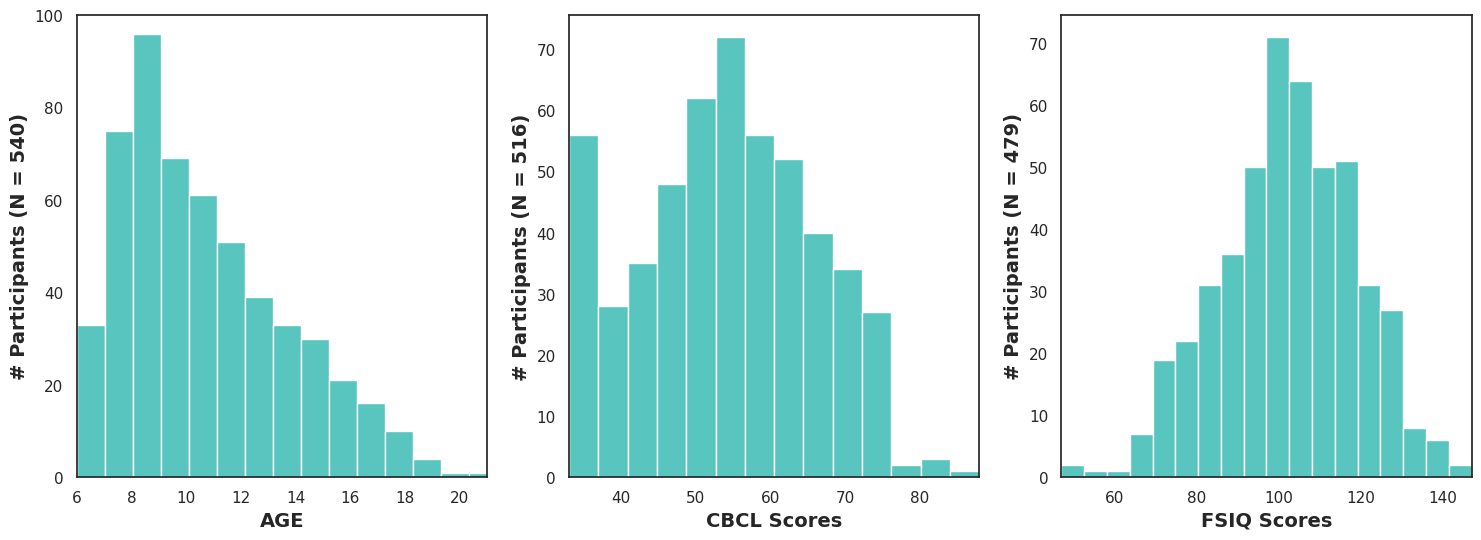

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

behav_data = pd.read_excel('/content/drive/MyDrive/behav_HBN_data.xlsx')

sns.set(style="white")

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(data = behav_data, x = "AGE", kde = False, fill = True, color = 'lightseagreen')
plt.xlabel('AGE', fontweight ='bold', fontsize = 14)
plt.ylabel('# Participants (N = 540)',  fontweight ='bold', fontsize = 14)
plt.xlim(6, 21)
plt.ylim(0, 100)

plt.subplot(1, 3, 2)
sns.histplot(data = behav_data, x = "CBCL", kde = False, color = 'lightseagreen')
plt.xlabel('CBCL Scores', fontweight ='bold', fontsize = 14)
plt.ylabel('# Participants (N = 516)',  fontweight ='bold', fontsize = 14)
plt.xlim(33, 88)
#plt.ylim(0, 100)

plt.subplot(1, 3, 3)
sns.histplot(data = behav_data, x = "FSIQ", kde = False, color = 'lightseagreen')
plt.xlabel('FSIQ Scores', fontweight ='bold', fontsize = 14)
plt.ylabel('# Participants (N = 479)',  fontweight ='bold', fontsize = 14)
plt.xlim(47, 147)
#plt.ylim(0, 100)


#plt.savefig('/content/drive/MyDrive/hbn_phenotypic_distribution.png')


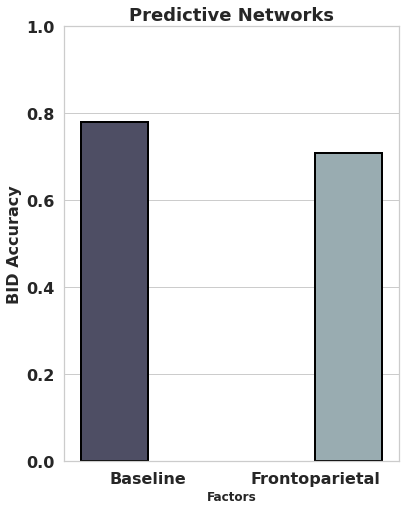

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FPN_CPM = pd.read_excel('/content/drive/MyDrive/manuscript_files/fingerprint_accuracy_cpm.xlsx')

plt.figure(figsize=(6, 8))
ax1 = sns.barplot(x = "Factors", y = "IDRate", hue = "Factors", data = FPN_CPM, palette = 'bone', edgecolor = 'black',linewidth = 2)
ax1.legend_.remove()

font_GSR = {'family': 'serif', 'color':  'dimgray', 'weight': 'bold', 'size': 16}
font_noGSR = {'family': 'serif', 'color':  'slategray', 'weight': 'bold', 'size': 16}

sns.set(style = 'whitegrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

ax1.set_ylim(0, 1)
ax1.set_ylabel('BID Accuracy', fontsize = 16, fontweight = 'bold')
#ax1.set_xlabel('Factors', fontsize = 15, fontweight = 'bold')
ax1.set_title("Predictive Networks", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

#ax1.text(0.7, 0.9, '42-76%', fontdict = font_GSR)
#ax1.text(2.3, 0.9, '71-81%', fontdict = font_noGSR)


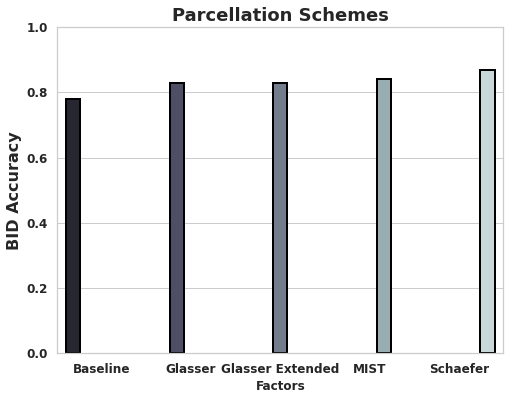

In [ ]:
Parcellation_CPM = pd.read_excel('/content/drive/MyDrive/manuscript_files/fingerprint_accuracy_cpm.xlsx', sheet_name = 'Parcellation')

plt.figure(figsize=(8, 6))
ax1 = sns.barplot(x = "Factors", y = "IDRate", hue = "Factors", data = Parcellation_CPM, palette = 'bone', edgecolor = 'black',linewidth = 2)
ax1.legend_.remove()

font_GSR = {'family': 'serif', 'color':  'dimgray', 'weight': 'bold', 'size': 16}
font_noGSR = {'family': 'serif', 'color':  'slategray', 'weight': 'bold', 'size': 16}

sns.set(style = 'whitegrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

ax1.set_ylim(0, 1)
ax1.set_ylabel('BID Accuracy', fontsize = 16, fontweight = 'bold')
#ax1.set_xlabel('Factors', fontsize = 15, fontweight = 'bold')
ax1.set_title("Parcellation Schemes", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

#ax1.text(0.7, 0.9, '42-76%', fontdict = font_GSR)
#ax1.text(2.3, 0.9, '71-81%', fontdict = font_noGSR)

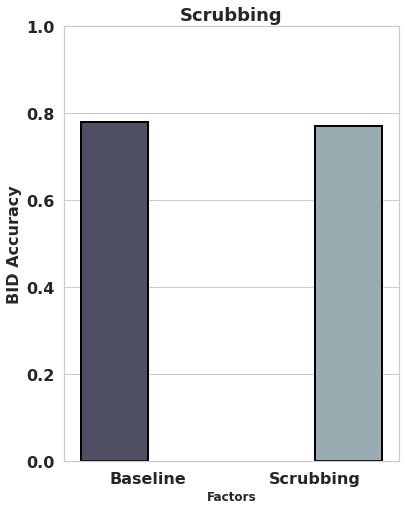

In [ ]:
Scrubbing_CPM = pd.read_excel('/content/drive/MyDrive/manuscript_files/fingerprint_accuracy_cpm.xlsx', sheet_name = 'Scrubbing')

plt.figure(figsize=(6, 8))
ax1 = sns.barplot(x = "Factors", y = "IDRate", hue = "Factors", data = Scrubbing_CPM, palette = 'bone', edgecolor = 'black',linewidth = 2)
ax1.legend_.remove()

font_GSR = {'family': 'serif', 'color':  'dimgray', 'weight': 'bold', 'size': 16}
font_noGSR = {'family': 'serif', 'color':  'slategray', 'weight': 'bold', 'size': 16}

sns.set(style = 'whitegrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

ax1.set_ylim(0, 1)
ax1.set_ylabel('BID Accuracy', fontsize = 16, fontweight = 'bold')
#ax1.set_xlabel('Factors', fontsize = 15, fontweight = 'bold')
ax1.set_title("Scrubbing", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

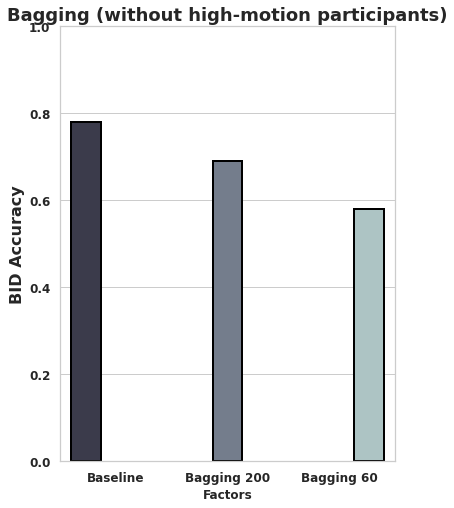

In [ ]:
Bagging_1_CPM = pd.read_excel('/content/drive/MyDrive/manuscript_files/fingerprint_accuracy_cpm.xlsx', sheet_name = 'Bagging_1')

plt.figure(figsize=(6, 8))
ax1 = sns.barplot(x = "Factors", y = "IDRate", hue = "Factors", data = Bagging_1_CPM, palette = 'bone', edgecolor = 'black',linewidth = 2)
ax1.legend_.remove()

font_GSR = {'family': 'serif', 'color':  'dimgray', 'weight': 'bold', 'size': 16}
font_noGSR = {'family': 'serif', 'color':  'slategray', 'weight': 'bold', 'size': 16}

sns.set(style = 'whitegrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

ax1.set_ylim(0, 1)
ax1.set_ylabel('BID Accuracy', fontsize = 16, fontweight = 'bold')
#ax1.set_xlabel('Factors', fontsize = 15, fontweight = 'bold')
ax1.set_title("Bagging (without high-motion participants)", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


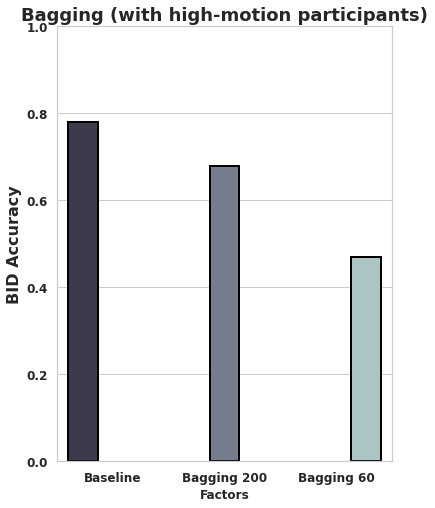

In [ ]:
Bagging_2_CPM = pd.read_excel('/content/drive/MyDrive/manuscript_files/fingerprint_accuracy_cpm.xlsx', sheet_name = 'Bagging_2')

plt.figure(figsize=(6, 8))
ax1 = sns.barplot(x = "Factors", y = "IDRate", hue = "Factors", data = Bagging_2_CPM, palette = 'bone', edgecolor = 'black',linewidth = 2)
ax1.legend_.remove()

font_GSR = {'family': 'serif', 'color':  'dimgray', 'weight': 'bold', 'size': 16}
font_noGSR = {'family': 'serif', 'color':  'slategray', 'weight': 'bold', 'size': 16}

sns.set(style = 'whitegrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

ax1.set_ylim(0, 1)
ax1.set_ylabel('BID Accuracy', fontsize = 16, fontweight = 'bold')
#ax1.set_xlabel('Factors', fontsize = 15, fontweight = 'bold')
ax1.set_title("Bagging (with high-motion participants)", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [ ]:
Parcellation_CPM = pd.read_excel('/content/drive/MyDrive/manuscript_files/fingerprint_accuracy_cpm.xlsx', sheet_name = 'Bagging_2')
Parcellation_CPM


,Factors,IDRate
0,Baseline,0.78
1,Bagging 200,0.68
2,Bagging (minTP = 60 & TP = 20),0.47


In [ ]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/ABIDE_Steiger.xlsx", sheet_name = 'HBN_Steiger')
data.head()

,target,pos_pred_base_age,neg_pred_base_age,comb_pred_base_age,pos_pred_Glasser_age,neg_pred_Glasser_age,comb_pred_Glasser_age,pos_pred_GlasserE_age,neg_pred_GlasserE_age,comb_pred_GlasserE_age,pos_pred_MIST_age,neg_pred_MIST_age,comb_pred_MIST_age,pos_pred_Schaefer_age,neg_pred_Schaefer_age,comb_pred_Schaefer_age,pos_pred_Scrub_age,neg_pred_Scrub_age,comb_pred_Scrub_age
0,9.17,11.834426,13.624573,12.603859,10.852479,12.565849,11.631025,11.481155,13.077112,12.245297,12.136679,12.973145,12.558763,11.409919,11.447057,11.413708,11.800656,13.537017,12.528180
1,12.84,11.183556,12.941950,11.896688,10.153918,12.078148,10.980052,11.823269,13.752356,12.758194,11.404693,12.562380,11.946476,10.023699,12.308716,11.008684,10.883509,12.901417,11.664145
2,14.17,13.843123,14.488550,14.242239,13.867158,14.379136,14.270680,14.588848,14.569496,14.749667,13.095546,14.160744,13.664106,13.437486,13.801643,13.730526,13.831218,14.240962,14.145497
3,12.92,13.081120,11.874731,12.660047,14.157378,13.581965,14.056918,14.145909,12.972316,13.725327,13.512566,12.903477,13.302616,13.443811,13.235874,13.466634,12.664325,11.742591,12.355767
4,12.73,10.661701,10.943787,10.719934,10.847419,10.591969,10.669123,10.777173,10.919171,10.795920,11.245447,10.314086,10.786480,11.879773,10.911668,11.434824,9.723106,10.359663,9.856270


In [ ]:
import scipy.stats as sp
sp.pearsonr(data['neg_pred_base_age'], data['neg_pred_MIST_age'])

PearsonRResult(statistic=0.9561352657060626, pvalue=3.7469707684014796e-164)

In [ ]:
import numpy as np
files = "/content/drive/MyDrive/CMU_b_0050669_fd_motion_params.txt"
test = np.loadtxt(files)
import nibabel as nb
test2 = np.loadtxt('/content/drive/MyDrive/CMU_b_0050669_ABIDE_268Parcels_rest_2mm.txt')
test2.shape


(316, 268)

In [ ]:
import nibabel as nb
test2 = nb.load('/content/drive/MyDrive/CMU_b_0050669_func_preproc.nii.gz')
test2.shape


(61, 73, 61, 316)

In [ ]:
import numpy as np
files = "/content/drive/MyDrive/temp"
test = np.loadtxt(files)
test.shape

In [ ]:
import numpy as np
import glob as glob

motion_datapath = '/content/drive/MyDrive/ABIDE_motion_params_fdrms_HM/*_fd_motion_params.txt'
filename_list = np.sort(glob.glob(motion_datapath))

for motionfile in range(len(filename_list)):

  temp = np.loadtxt(filename_list[motionfile])
  mean_fdrms = np.mean(temp)
  print(mean_fdrms)

##### Additional

In [ ]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ICC_BID.xlsx")
data.head()

,Dataset,BID,ICC
0,NYUadu,0.65,0.21
1,NYUado,0.77,0.23
2,UPSM,0.42,0.15
3,BNU,0.49,0.21
4,SWU,0.75,0.29


In [ ]:
pip install pingouin

In [ ]:
import pingouin as pg
pg.corr(data['BID'], data['ICC'], method = 'pearson', alternative='two-sided', correction = True)

,n,r,CI95%,p-val,BF10,power
pearson,5,0.816914,"[-0.23, 0.99]",0.091415,1.702,0.433355


In [ ]:
import pandas as pd
import pingouin as pg
data = pd.read_excel("/content/drive/MyDrive/manuscript_files/ID_DP.xlsx", sheet_name = 'paired_All_2')
data.head()



,Dataset,All,DP_Top1,DP_Top75,DP_Top10
0,BNU,0.49,0.35,0.50,0.50
1,NYUado,0.77,0.50,0.77,0.75
2,NYUadu,0.65,0.47,0.70,0.68
3,SWU,0.75,0.64,0.76,0.77
4,UPSM,0.42,0.21,0.43,0.37


In [ ]:
pg.ttest(data['DP_Top10'], data['All'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.136717,4,two-sided,0.897859,"[-0.04, 0.04]",0.012148,0.401,0.050052
